In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
base_path = '/content/gdrive/MyDrive/upwork/applied_cv/'

In [3]:
import os

In [4]:
!pwd
os.chdir(base_path)
!pwd

/content
/content/gdrive/MyDrive/upwork/applied_cv


In [5]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets._samples_generator import make_blobs
from itertools import cycle
from PIL import Image
from matplotlib import cm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

In [39]:
def segmented_image(value):
  img = Image.open(value)
  img = np.array(img)

  # saving the image shape
  shape = img.shape

  # reshaping image
  reshape_img = np.reshape(img, [-1, 3])

  bandwidth = estimate_bandwidth(reshape_img, quantile=0.1, n_samples=100)

  msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  msc.fit(reshape_img)

  print(f"number of estimated segments : {len(np.unique(msc.labels_))}")

  labels = msc.labels_
  result_image = np.reshape(labels, shape[:2])

  # displaying the segmented image
  fig = plt.figure(1, figsize=(14, 12))
  ax = fig.add_subplot(122)
  ax = plt.imshow(result_image)  
  plt.show()

  min_max_scaler = preprocessing.MinMaxScaler()

  scaled_image = min_max_scaler.fit_transform(result_image)

  im = Image.fromarray(np.uint8(cm.gist_earth(scaled_image)*255))

  return im





number of estimated segments : 9


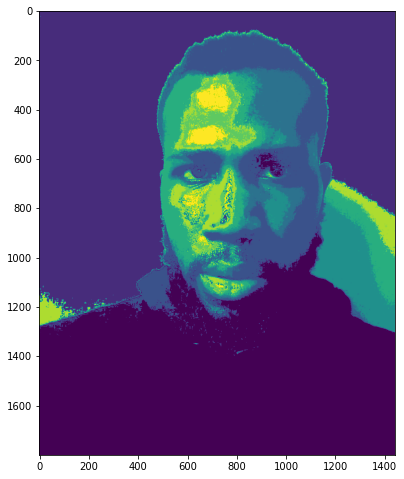

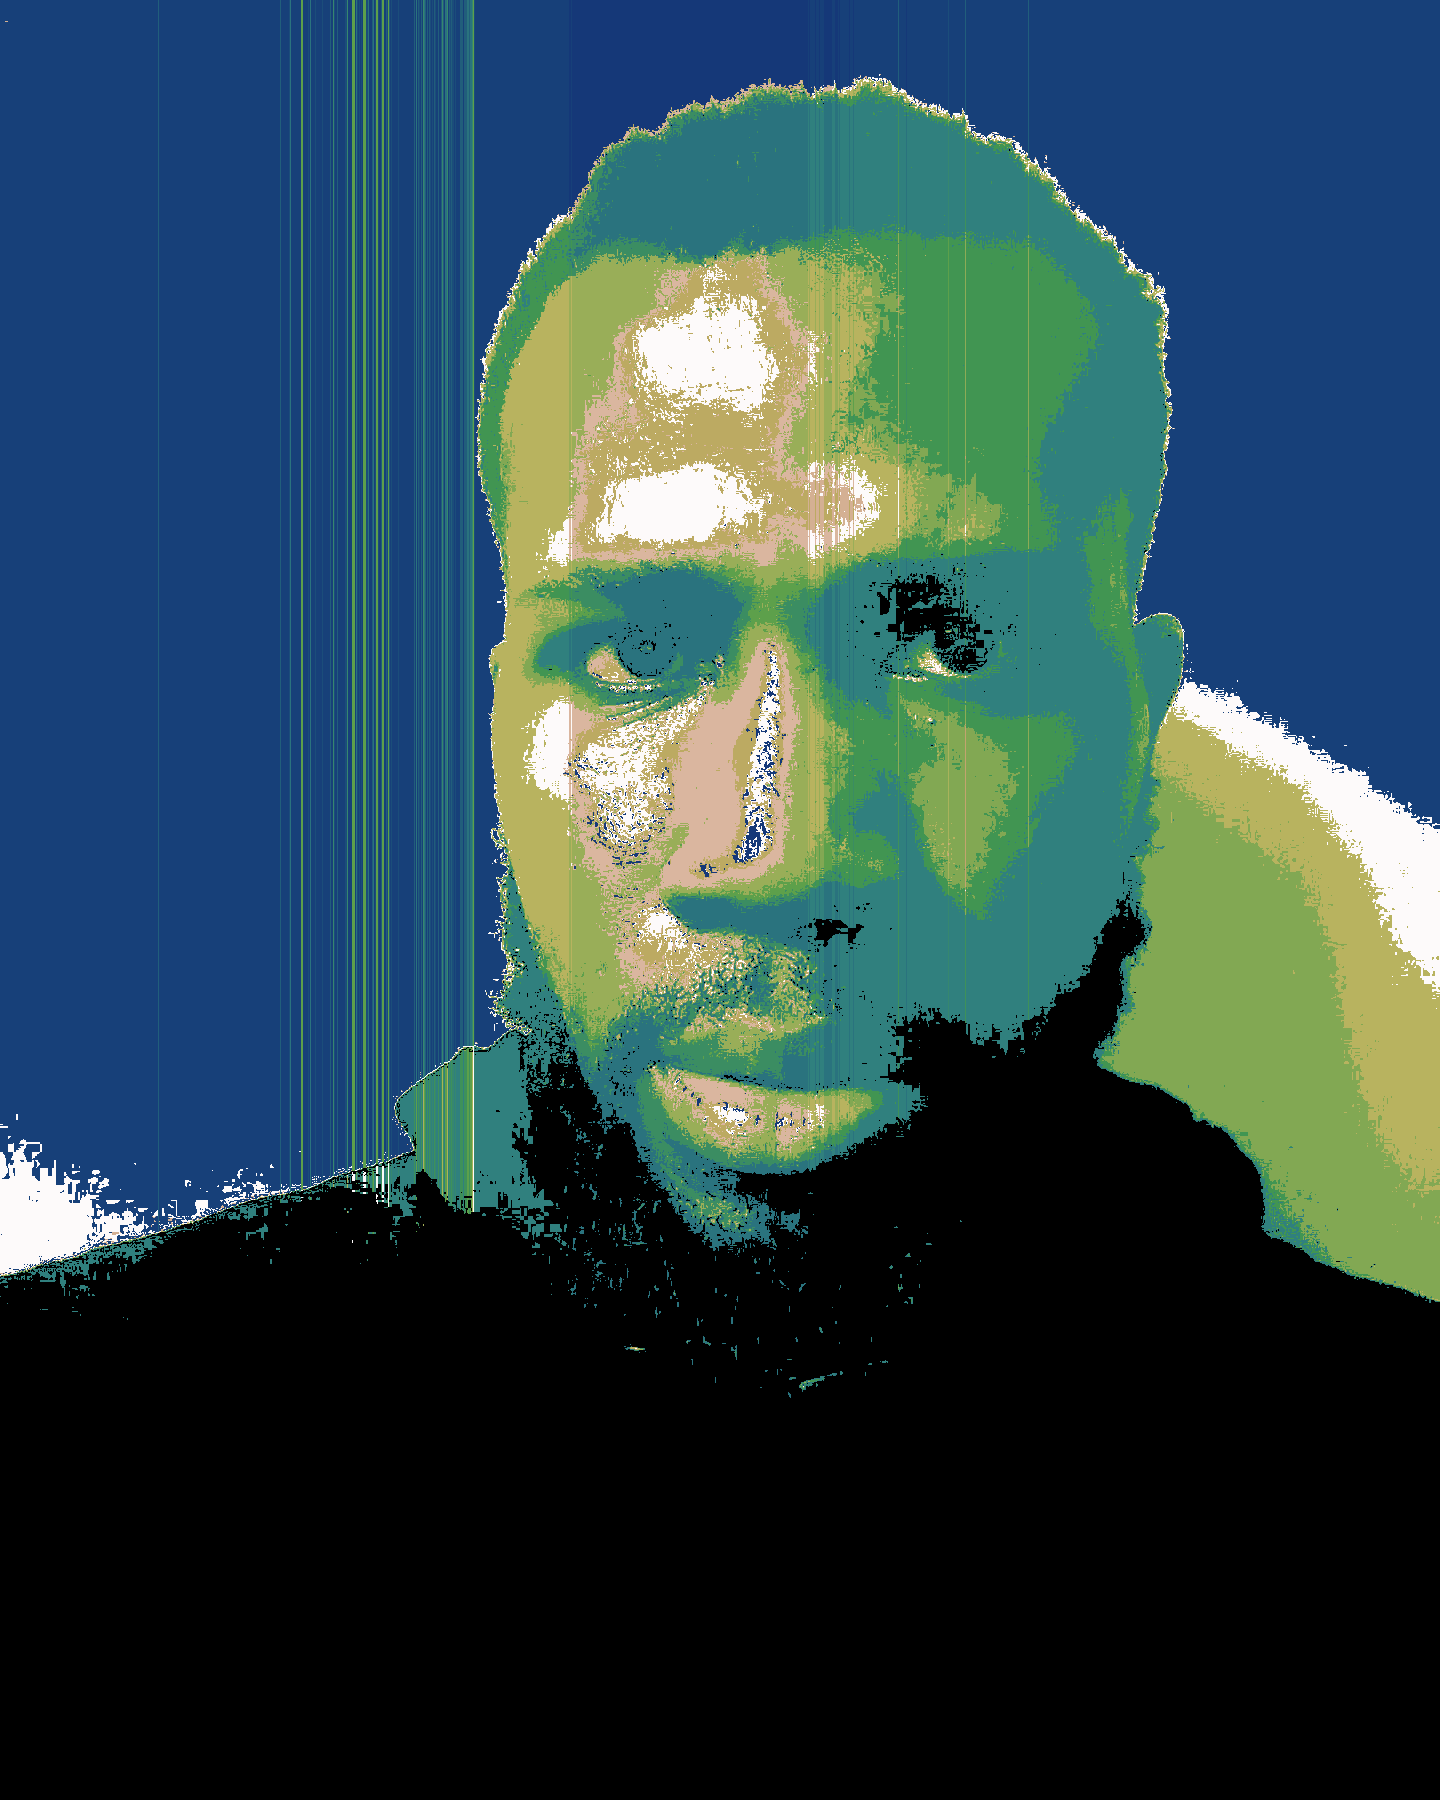

In [40]:
segmented_image('Ubajaka_Chijioke.jpg')